## Below we are going on to do bootstrap resampling

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Import `os'
import os

In [3]:
## Now that `os' is downloaded, I'm going to save the command to get the working directory as `cwd'

cwd = os.getcwd()
cwd

'C:\\Users\\Juan Nunez'

In [4]:
## Now I want to change my working directory to the folder that contains my project files.
os.chdir("C:/Users/Juan Nunez/Desktop/DATA_201")
cwd = os.getcwd()
cwd

'C:\\Users\\Juan Nunez\\Desktop\\DATA_201'

In [5]:
## Now I list all files and directories in the current directory
os.listdir('.')

['.git',
 '.ipynb_checkpoints',
 'ASSIG1_DATA.csv',
 'ASSIG1_DATA.xlsx',
 'Basic Matplotlib.ipynb',
 'Basic Numpy.ipynb',
 'Basic Pandas.ipynb',
 'Basic Python 1.ipynb',
 'HD4.stc',
 'HDAT4.tsv',
 'HDATA4-Codebook.pdf',
 'hespese4.dta',
 'HESPESE_4.sav',
 'LESDATA.csv',
 'Non-parametric Simulations Bootstrapping.ipynb',
 'Project_1.ipynb',
 'SPSS_DATA_FOR_Python.sav']

In [6]:
## I start by importing pandas and then I assign the project spreadsheet to the file named `PROJECT1_DATA'
import pandas as pd
PROJECT2_DATA = "ASSIG1_DATA.xlsx"

In [7]:
## Once the command above runs, I load the spreadsheet
WB_DATA = pd.ExcelFile(PROJECT2_DATA)

In [8]:
## Finally, I load the sheet into a DataFrame using the name : WB_DF
WB_DF = WB_DATA.parse('in')
WB_DF.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V347,V348,V349,V350,V351,V352,V353,V354,V355,V356
1,1.0,AFGN,Afghanistan,1.831347e-317,86.0,NaN,NaN,4.770435e-312,4.66726e-62,1.992802e-314,...,30.0,1.0,1.831347e-317,1.831347e-317,1903598564354620012848663309848014638105555257...,86,1903598564987169929952080041494215270208234778...,1903598564986480049620822663735025514030830122...,4.66726e-62,-1.54235e-180
2,2.0,ALBN,Albania,3.500000e+01,NaN,NaN,NaN,4.770435e-312,4.66726e-62,1.992802e-314,...,23.0,0.0,3.700000e+01,4.200000e+01,-1.54235e-180,-606598799537778030498068346917171621787230526...,-1.54235e-180,1903598568784539979317334521818912869329625308...,-1.54235e-180,7387368604391389961531629446154911340063321473...
3,3.0,ALGR,Algeria,5.300000e+01,55.0,42.0,36.0,1.068570e-314,4.1517640553345e-317,1.992802e-314,...,51.0,0.0,6.600000e+01,8.000000e+01,-606598799537817016346544476218695288720880200...,1903598568786010013161051008606437999670011858...,-606598800007985974824244695882971448392624142...,-1.54235e-180,1903598566250489963479367665884899417273199752...,2954938174092550001904709013576950425412680971...
4,4.0,ANGL,Angola,2.800000e+01,72.0,29.0,NaN,6.716447e-318,4.66726e-62,1.992802e-314,...,25.0,0.0,1.831347e-317,1.831347e-317,4.66726e-62,7.26357130900034e-317,-1.54235e-180,4.66726e-62,4.66726e-62,-606598800008254011886128563748725335065048576...
5,5.0,ARGN,Argentina,8.700000e+01,5.0,NaN,NaN,1.068606e-314,-1.54235e-180,2.279817e-319,...,45.0,0.0,3.300000e+01,3.800000e+01,-1.54235e-180,-606598799066861980444196006434445767939750809...,4.15151109372383e-317,1903598566251259851814031260320756694407721359...,-606598800007641013669782208205381996254188452...,7.98247e-157


In [9]:
## Now that the DataFrame seems to be succesfully uploaded to Python, I will start with the project. 
## I start by looking at the dimension of the Dataframe
WB_DF.shape

(148, 356)

In [10]:
## The variable I will be using for the analysis is going to be V5 % ADULT FEMALE ILLITERACY 1990
WB_DF['V5']

1      86.0
2       NaN
3      55.0
4      72.0
5       5.0
6       NaN
7       2.0
8       2.0
9       NaN
10     78.0
11      NaN
12      2.0
13     84.0
14     75.0
15     29.0
16     35.0
17     20.0
18      NaN
19     91.0
20     60.0
21     78.0
22     57.0
23      2.0
24     75.0
25     82.0
26      7.0
27     38.0
28     14.0
29     56.0
30      7.0
       ... 
119     2.0
120     2.0
121    49.0
122     NaN
123     NaN
124    10.0
125    69.0
126     NaN
127    44.0
128    29.0
129     NaN
130    65.0
131     NaN
132     NaN
133     2.0
134     2.0
135     4.0
136     NaN
137    10.0
138    16.0
139    74.0
140    12.0
141    39.0
142    35.0
143    40.0
144     NaN
145     NaN
146     NaN
147     NaN
148     NaN
Name: V5, Length: 148, dtype: float64

In [11]:
WB_DF = WB_DF.dropna(subset = ['V5'])

In [12]:
## The variable I will be using for the analysis is going to be V5 % ADULT FEMALE ILLITERACY 1990
WB_DF['V5']

1      86.0
3      55.0
4      72.0
5       5.0
7       2.0
8       2.0
10     78.0
12      2.0
13     84.0
14     75.0
15     29.0
16     35.0
17     20.0
19     91.0
20     60.0
21     78.0
22     57.0
23      2.0
24     75.0
25     82.0
26      7.0
27     38.0
28     14.0
29     56.0
30      7.0
31     60.0
34      2.0
35     18.0
36     16.0
37     66.0
       ... 
101    12.0
102    21.0
103    11.0
105    19.0
109    63.0
110    52.0
111    75.0
112    89.0
114    86.0
116     7.0
117    17.0
118    88.0
119     2.0
120     2.0
121    49.0
124    10.0
125    69.0
127    44.0
128    29.0
130    65.0
133     2.0
134     2.0
135     4.0
137    10.0
138    16.0
139    74.0
140    12.0
141    39.0
142    35.0
143    40.0
Name: V5, Length: 102, dtype: float64

In [13]:
WB_DF.shape

(102, 356)

In [14]:
## I take the variable I am going to be using.
WB_DF2 = WB_DF['V5']
type(WB_DF2)

pandas.core.series.Series

In [15]:
## I start by taking the mean
np.random.seed(9)
samp1 = np.random.choice(WB_DF2, 102)
samp1

array([ 2., 55., 30., 14.,  2., 14., 27., 15., 29., 65., 52.,  2.,  2.,
       86., 62., 15., 69., 11., 30.,  2., 28., 20., 75., 49., 30., 55.,
       30., 39., 35., 53., 82., 75., 86., 30., 42., 87., 91., 15., 79.,
       52., 52.,  2., 55., 87., 14.,  7., 29.,  2., 39., 27., 79., 86.,
       11., 30., 57.,  2.,  2.,  7., 82., 30., 29.,  2., 12.,  2., 55.,
        2., 65., 52., 62., 78.,  1., 83., 66.,  7., 12., 79., 82., 66.,
       32.,  7., 82., 30.,  7., 16.,  2., 57., 35., 32., 30., 60., 19.,
       66., 62., 65.,  2., 17., 11., 65.,  2., 55., 10., 52.])

In [16]:
## We see that the sample mean is close to the real mean
print(WB_DF2.mean())
print(samp1.mean())

38.72549019607843
38.31372549019608


In [17]:
## Now we do the bootstrap
sample_means = []
for i in range(1000):
                boot_sample = np.random.choice(samp1, 100)
                sample_means.append(boot_sample.mean())

In [19]:
## The length of the variable that contains our means
len(sample_means)

1000

In [20]:
## What is the mean of the sample means?
np.mean(sample_means)

38.17194

In [21]:
## The length of our samples' means is close to the real mean.
conf_int = np.percentile(sample_means, [2.5, 97.5]) # The middle 95% interval
conf_int

array([32.589 , 43.7315])

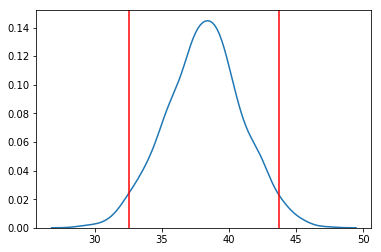

In [22]:
## We see that the mean of the means lies inside the confidence interval.  Let's look at it graphically.
sns.kdeplot(sample_means)
for endpoint in conf_int:
    plt.axvline(endpoint, color='red')